In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 9999


from datetime import datetime
str(datetime.now())




'2018-08-14 17:52:40.613138'

In [3]:
df = pd.read_csv('../../measurements/Excel Files/task 3/Western Basin/maumeeriver_average.csv', encoding="ISO-8859-1")

In [4]:
df.head()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
0,1980,1,1,2.071026e+07,NaN,57000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980,1,2,1.685691e+07,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980,1,3,1.293015e+07,2.0,32000.0,NaN,220.0,110.0,NaN,NaN,7700.0,NaN,14100.0,NaN,10.0,62000.0,NaN,72000.0,7.7,NaN,NaN,NaN,7400.0,2600.0,2600.0,40.0,NaN
3,1980,1,4,1.012882e+07,NaN,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980,1,5,8.159329e+06,NaN,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from datetime import datetime
df['Date'] = df.apply(lambda x:datetime.strptime("{0} {1} {2} 00:00:00".format(int(x['Year']), int(x['Month']), int(x['Day'])), "%Y %m %d %H:%M:%S"),axis=1)

In [6]:
df.describe()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
count,13540.000000,13540.000000,13540.000000,1.354000e+04,5994.000000,8.280000e+03,558.000000,3253.000000,245.000000,558.000000,5.0000,169.000000,74.000000,5538.000000,33.000000,579.000000,347.000000,0.0,260.000000,3312.000000,0.0,0.0,51.000000,237.000000,9.000000,11.000000,219.000000,15.000000
mean,1998.035081,6.512482,15.725332,1.374651e+07,13.374920,8.409676e+04,72.790323,246.418562,71.959184,222.969534,37.3200,7369.763314,54.459459,10659.444465,24862.151515,100.190415,61054.178674,NaN,58830.384615,8.146863,NaN,NaN,38.431373,6408.481013,2264.444444,2282.727273,37.269863,226800.000000
std,10.699373,3.453862,8.798839,2.191189e+07,9.449523,1.236383e+05,60.931637,192.457537,53.496729,186.951488,15.2775,1704.619408,59.475836,2509.107705,11400.628503,129.546232,25710.511921,NaN,14991.562616,0.407698,NaN,NaN,47.639167,31671.987687,3368.174992,3111.488682,55.681714,161717.213502
min,1980.000000,1.000000,1.000000,1.345617e+05,-0.100000,1.000000e+03,4.000000,8.000000,10.000000,11.000000,18.9000,4500.000000,30.000000,4300.000000,171.000000,9.000000,10100.000000,NaN,17000.000000,7.000000,NaN,NaN,10.000000,10.000000,340.000000,340.000000,0.000000,5000.000000
25%,1989.000000,4.000000,8.000000,1.947474e+06,4.100000,2.300000e+04,20.000000,140.000000,20.000000,55.000000,29.9000,6440.000000,30.000000,8600.000000,15300.000000,26.000000,42750.000000,NaN,47150.000000,7.800000,NaN,NaN,10.000000,1700.000000,650.000000,600.000000,10.000000,102000.000000
50%,1998.000000,7.000000,16.000000,5.198973e+06,13.300000,4.100000e+04,66.000000,197.000000,70.000000,202.000000,31.5000,7100.000000,30.000000,10700.000000,24900.000000,52.000000,58000.000000,NaN,58750.000000,8.200000,NaN,NaN,20.000000,5030.000000,960.000000,990.000000,19.000000,220000.000000
75%,2007.000000,10.000000,23.000000,1.519629e+07,22.500000,8.700000e+04,111.000000,278.000000,110.000000,344.625000,51.7000,7860.000000,47.500000,12700.000000,34200.000000,117.500000,76000.000000,NaN,68975.000000,8.400000,NaN,NaN,40.000000,6700.000000,2200.000000,2400.000000,36.400000,352500.000000
max,2017.000000,12.000000,31.000000,2.566458e+08,31.300000,1.880000e+06,402.000000,4600.000000,350.000000,1230.000000,54.6000,15900.000000,390.000000,20000.000000,49100.000000,1200.000000,160000.000000,NaN,99000.000000,9.400000,NaN,NaN,230.000000,490000.000000,11000.000000,11000.000000,378.000000,514000.000000


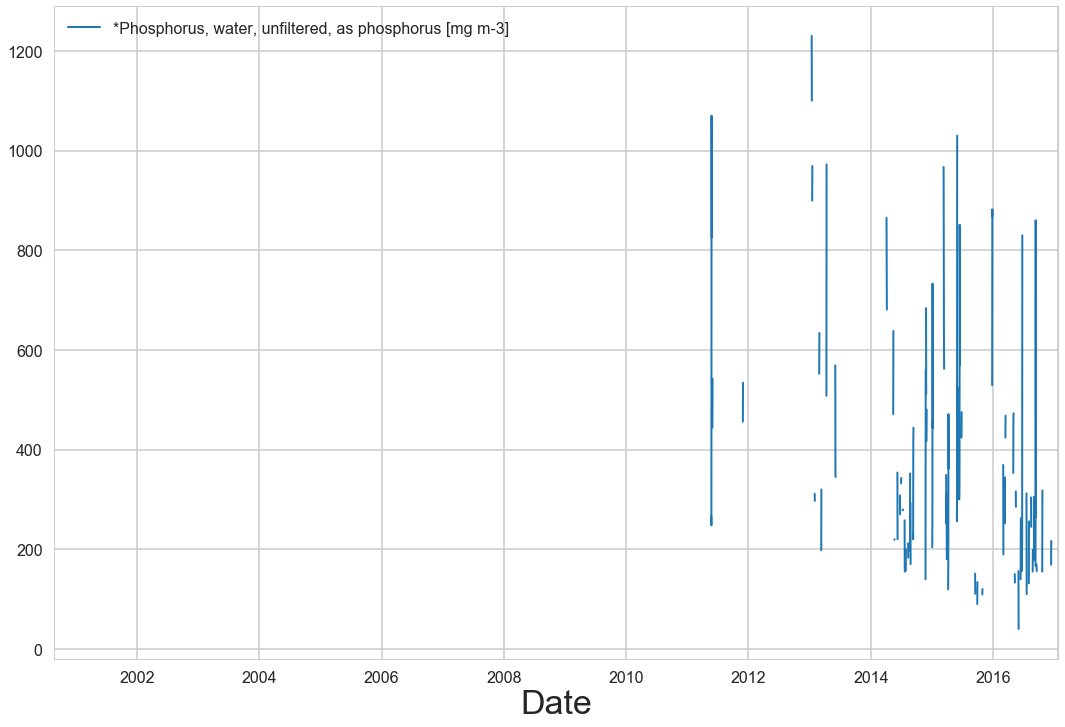

In [27]:
df[-6000:].plot(x='Date', y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]')

In [8]:
gdf = df.groupby(['Year']).mean()[-18:]

In [9]:
gdf['P load'] = gdf['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']*gdf['Inflow volume [m3 d-1]']

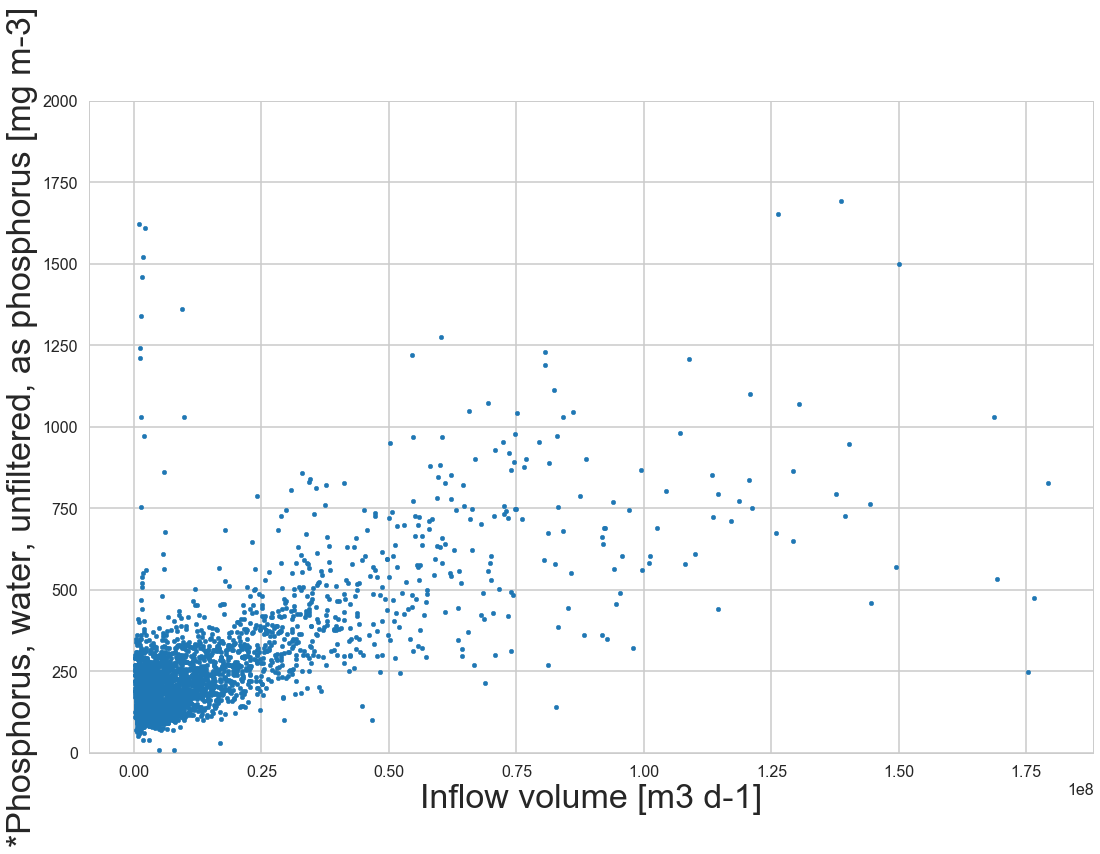

In [34]:
df.plot(y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', x='Inflow volume [m3 d-1]', kind='scatter',ylim=(0,2000))

In [11]:
df['P load'] = df['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']*df['Inflow volume [m3 d-1]']

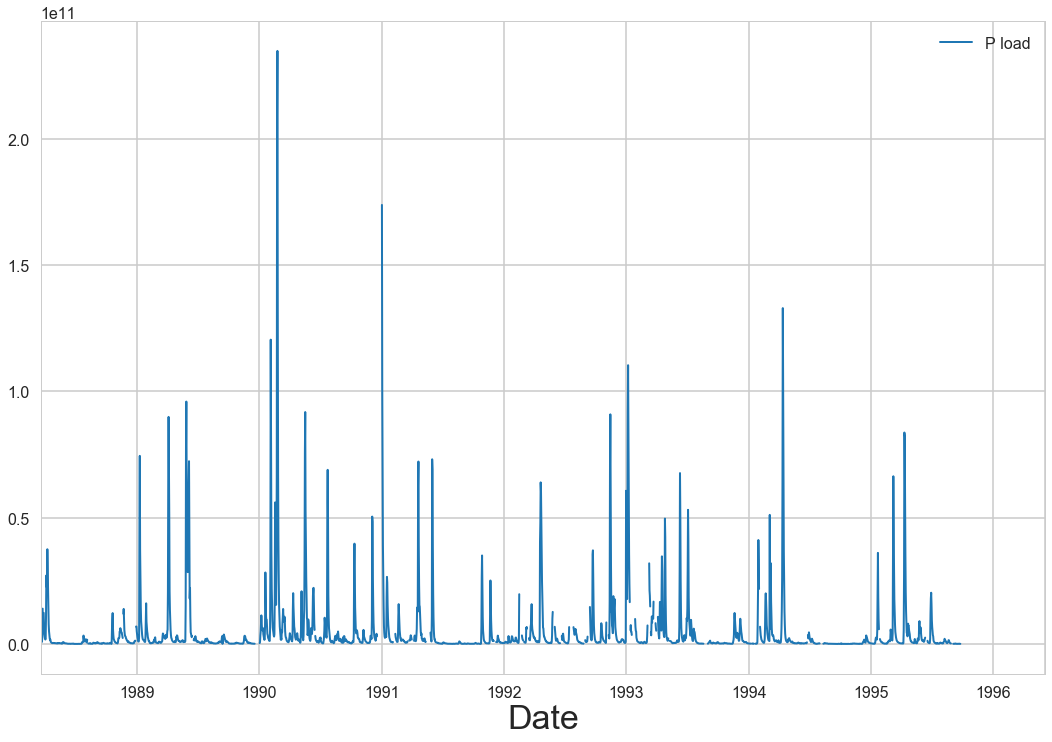

In [19]:
df[3000:6000].plot(y='P load',x='Date')

In [30]:
#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


In [38]:
mdf = df[['Date','*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', 'Inflow volume [m3 d-1]', '*Suspended sediment concentration [mg m-3]', 'Inflow temperature [°C]']]

In [40]:
mdf.describe()

,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
count,3253.000000,1.354000e+04,8.280000e+03,5994.000000
mean,246.418562,1.374651e+07,8.409676e+04,13.374920
std,192.457537,2.191189e+07,1.236383e+05,9.449523
min,8.000000,1.345617e+05,1.000000e+03,-0.100000
25%,140.000000,1.947474e+06,2.300000e+04,4.100000
50%,197.000000,5.198973e+06,4.100000e+04,13.300000
75%,278.000000,1.519629e+07,8.700000e+04,22.500000
max,4600.000000,2.566458e+08,1.880000e+06,31.300000


In [48]:
mdf.dropna().describe()

,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
count,1785.000000,1.785000e+03,1.785000e+03,1785.000000
mean,266.758590,1.406173e+07,9.034323e+04,13.304883
std,196.094909,2.195128e+07,1.442556e+05,9.366321
min,8.000000,1.345617e+05,3.000000e+03,-0.100000
25%,153.000000,1.985396e+06,2.500000e+04,4.350000
50%,212.000000,5.945179e+06,4.650000e+04,12.500000
75%,298.000000,1.578041e+07,8.600000e+04,22.900000
max,2030.000000,1.792117e+08,1.770000e+06,30.000000


In [52]:
mdfna = mdf.dropna()

In [55]:
mdfna.tail()

,Date,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
13410,2016-09-18,156.0,5284603.179,36000.0,23.2
13414,2016-09-22,222.0,3388507.131,39000.0,24.4
13418,2016-09-26,228.0,1447149.436,37000.0,21.9
13421,2016-09-29,203.0,2829464.619,31000.0,18.2
13425,2016-10-03,256.0,5810616.922,61000.0,18.9


In [56]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import ml_metrics, string, re, pylab as pl
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, explained_variance_score, accuracy_score
from sklearn import svm

In [65]:
df[df.columns[3:]].corr()['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']

Inflow volume [m3 d-1]                                               0.644574
Inflow temperature [°C]                                             -0.041222
*Suspended sediment concentration [mg m-3]                           0.693184
*Orthophosphate, water, filtered, as phosphorus [mg m-3]             0.631030
*Phosphorus, water, unfiltered, as phosphorus [mg m-3]               1.000000
*Phosphorus, water, filtered, as phosphorus [mg m-3]                 0.517077
*Orthophosphate, water, filtered, as PO4 [mg m-3]                    0.630567
Inflow concentration of chlorophyll-a (Chla-P) [mg m-3]              0.332129
Inflow concentration of dissolved organic carbon (DOC) [mg m-3]      0.487277
Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3]    0.046277
Inflow concentration of O2 [mg m-3]                                 -0.180925
Inflow concentration of NO3 [mg m-3]                                 0.171959
Inflow concentration of NH4 [mg m-3]                            